<a href="https://colab.research.google.com/github/Harshavalmiki/SJSU-Data-Mining-255/blob/main/clustering_of_timeseries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!pip install matplotlib
!pip install seaborn
!pip install prophet

In [4]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [6]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
dataset_file_path = '/content/drive/MyDrive/DM/covid19_timeseries.csv'

In [11]:
# Load the dataset
file_path = dataset_file_path
data = pd.read_csv(file_path)

In [12]:
# Ensure the column names are "ds" and "y"
data = data.rename(columns={'date_column_name': 'ds', 'target_column_name': 'y'})
global_agg = data.groupby('Dates').sum()
global_agg


<ipython-input-12-59e22bdc11f2>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  global_agg = data.groupby('Dates').sum()


,Lat,Long,Confirmed Cases,Death Cases,Recovered Cases
Dates,,,,,
2020-01-22,5603.86785,6403.971914,555,17,28.0
2020-01-23,5603.86785,6403.971914,654,18,30.0
2020-01-24,5603.86785,6403.971914,941,26,36.0
2020-01-25,5603.86785,6403.971914,1434,42,43.0
2020-01-26,5603.86785,6403.971914,2118,56,102.0
...,...,...,...,...,...
2020-10-25,5603.86785,6403.971914,42960467,1153729,0.0
2020-10-26,5603.86785,6403.971914,43498333,1159490,0.0
2020-10-27,5603.86785,6403.971914,43965280,1166892,0.0


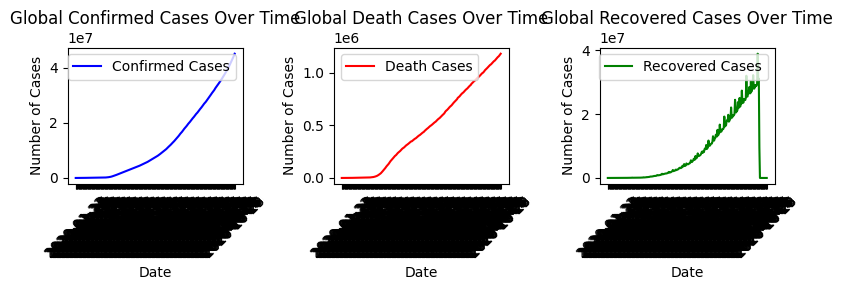

In [13]:
# Plotting global trends
plt.figure(figsize=(8, 3))

plt.subplot(1, 3, 1)
plt.plot(global_agg.index, global_agg['Confirmed Cases'], label='Confirmed Cases', color='blue')
plt.title('Global Confirmed Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.xticks(rotation=45)
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(global_agg.index, global_agg['Death Cases'], label='Death Cases', color='red')
plt.title('Global Death Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.xticks(rotation=45)
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(global_agg.index, global_agg['Recovered Cases'], label='Recovered Cases', color='green')
plt.title('Global Recovered Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.xticks(rotation=45)
plt.legend()

plt.tight_layout()
plt.show()
